In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate


#formatting plots a little nicer
plt.style.use('default')
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['pdf.fonttype'] = 42 # use to make sure exported pdf's have editable text

In [2]:
k = 2
rho = 2650
kappa = 1e-6
c = k/(rho*kappa)
alpha = 0.1
sigma = 5.67e-8

d0 = 4 # distance to tree in meters
r = 0.5 #radius of tree in m
h = 5 # total height of tree

tfire = 87.23969403904118 # seconds
Tfire = 1500 # in celsius
TKfire = Tfire + 273.15 # in Kelvins

E = 60e9
nu = 0.25
alpha = 1e-5
strength = 180e6

In [3]:
xmax = 0.2
dx = 0.005

tmax = 7200
dt = 1

x = np.arange(0, xmax+dx, dx)
xmid = np.arange(dx/2, xmax+(dx/2), dx)

t = np.arange(0,tmax+dt,dt)

In [4]:
T0 = 10 + 273.15
T = T0 * np.ones(np.size(xmid))

In [5]:
tvals = [x for x in range(210)]
def Temp(time):
    temp = -time*(time-3600)/3e3
    temp[temp<10]=10
    return temp

(0.0, 1080.15)

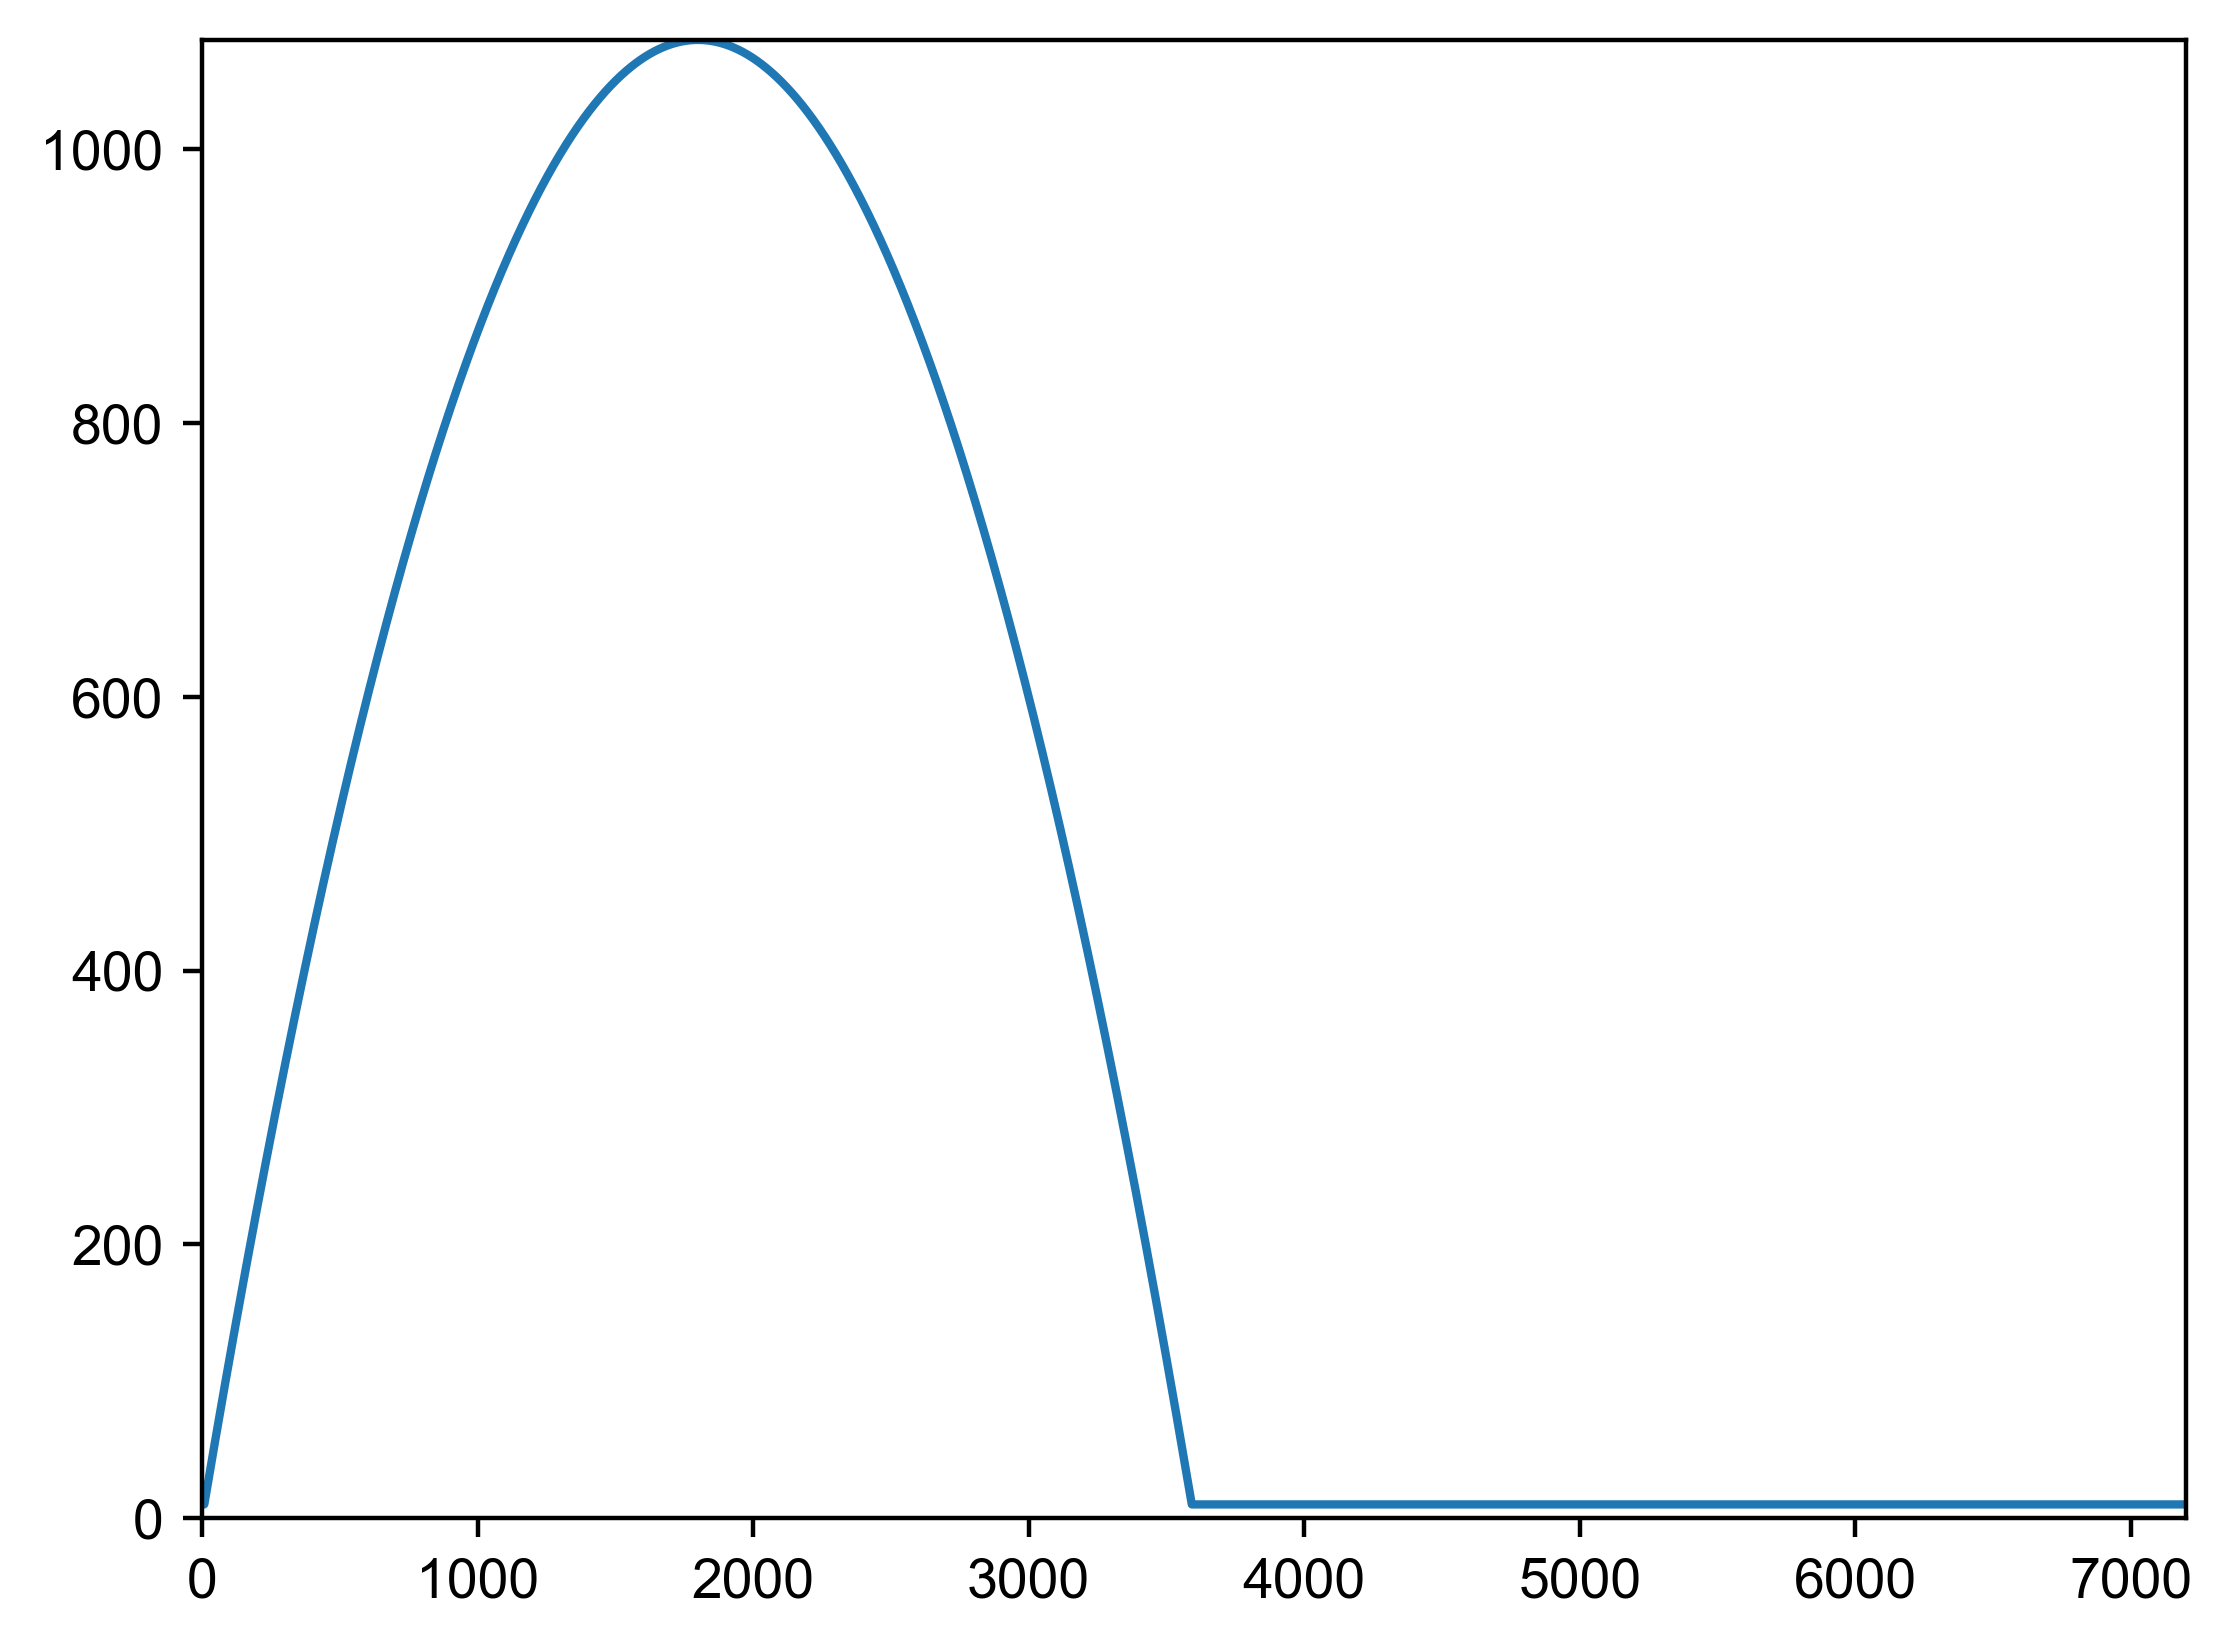

In [6]:
Tf = Temp(t)+273.15
plt.plot(t,Tf-273.15)
plt.xlim(0,tmax)
plt.ylim(0,max(Tf)-273)

In [7]:
Tf[1800]

1353.15

In [8]:
# tree discretization
tree_height = 5 #height in m
tree_delta_h = 0.1 #height of tree slices
tree_zs = np.arange(0,tree_height+tree_delta_h,tree_delta_h)

In [9]:
def Q_in(z,time,d): #z is height on wall
    return (1-alpha)*2*r*sigma*Tf[time]**4 / (2*d*np.pi) * ((h*d*(d**2+z*(h-z)))/((d**2+z**2)*(d**2+(z-h)**2)) + np.arctan(z/d) - np.arctan((z-h)/d))

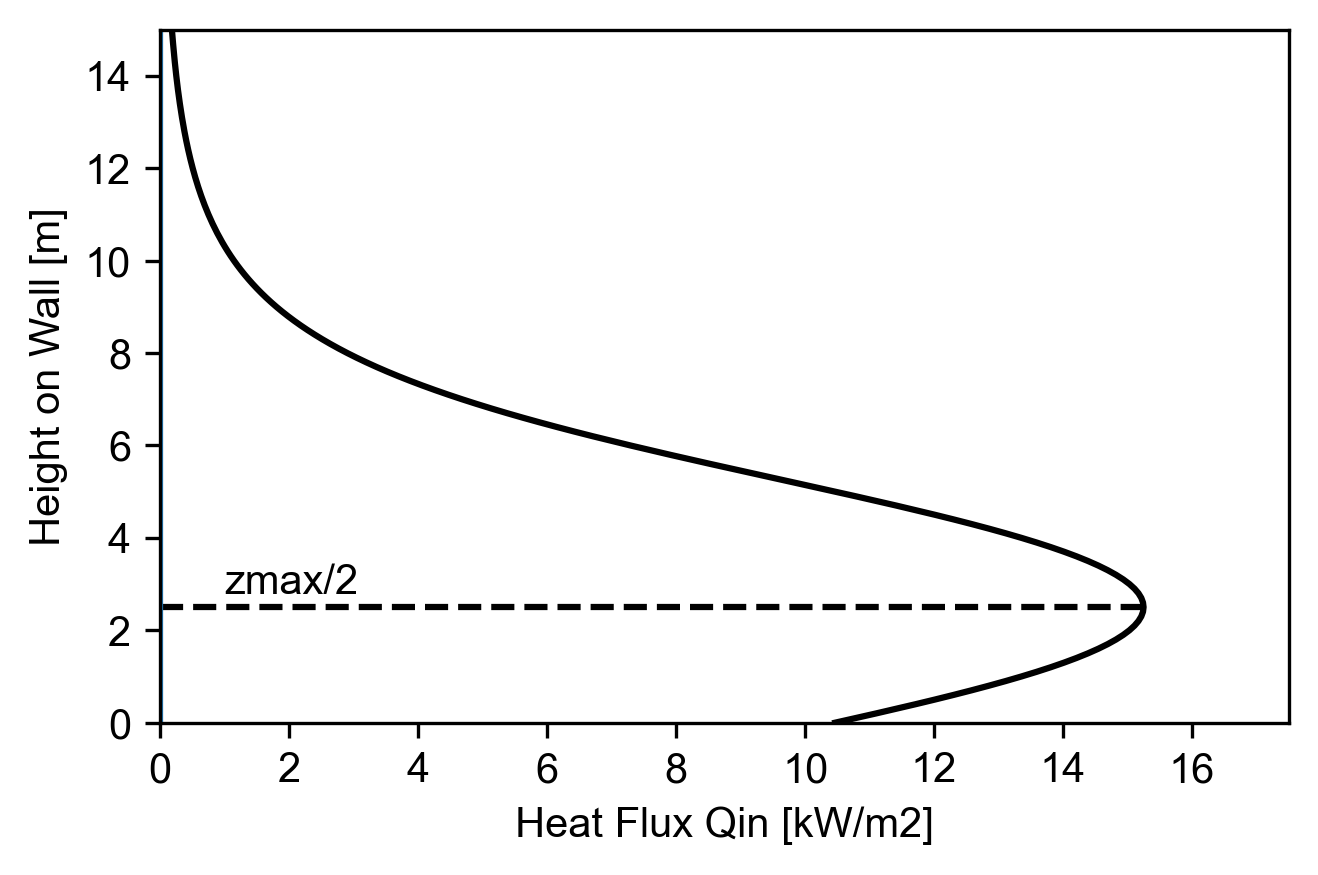

In [10]:
fig, ax1 = plt.subplots(figsize=(1.618*3,3), dpi=300)

z_vals = np.arange(0,15,0.1)
Q = Q_in(z_vals,1800,4)
plt.plot(Q/1000,z_vals, c='k')
plt.plot([0,max(Q)/1000],[h/2,h/2], c='k', ls='--')
plt.plot([0,0],[0,20])
plt.xlabel('Heat Flux Qin [kW/m2]')
plt.ylabel('Height on Wall [m]')
plt.text(1,2.8,'zmax/2')
plt.ylim(0,15)
plt.xlim(0,17.5)

plt.savefig('media/figures/fig7.pdf')

In [11]:
%%time

Q = np.zeros(np.size(x))
T0 = 10 + 273.15

Tcrit = 525
R=8314
Ea=7e7
spall_length = 0.01
alpha = 0.1

dz = 0.02
z0 = 0
zmax = 15
z_vals = np.arange(z0,zmax+dz,dz)

T = T0*np.ones((len(t),len(xmid),len(z_vals)))

nfires = 1
d = d0*np.ones((nfires+1,len(z_vals)))
damage = np.zeros((nfires+1,len(z_vals)))

for n in range(nfires):
    T = T0*np.ones((len(t),len(xmid),len(z_vals)))
    Q = np.zeros(np.size(x))
    for z in range(len(z_vals)): # array this loop    
        for i in range(len(t)-1):
            Qin = Q_in(z_vals[z],i,d[n,z])
            Qout = sigma * T[i,0,z]**4
            Qbase = 0
            Q0 = Qin - Qout
            Q[0] = Q0
            Q[-1] = Qbase
            Q[1:-1] = -k*np.diff(T[i,:,z])/dx
            dTdt = -(1/(rho*c))*np.diff(Q)/dx
        
            T[i+1,:,z] = T[i,:,z] + dTdt*dt

        if np.max(T[:,:,z])>Tcrit:
            d[n+1,z]=d[n,z]+spall_length
            damage[n+1,z] = 0
        else:
            d[n+1,z]=d[n,z]
            damage_add = np.exp(-Ea/(R*np.max(T[:,:,z])))/np.exp(-Ea/(R*Tcrit))
            damage[n+1,z] = damage[n,z] + damage_add
        if damage[n+1,z]>1:
            d[n+1,z]=d[n,z]+spall_length
            damage[n+1,z] = 0

CPU times: total: 1min 32s
Wall time: 1min 34s


In [15]:
i

5951

In [56]:
# %%time

# Q = np.zeros(np.size(x))
# T0 = 10 + 273.15

# Tcrit = 525
# R=8314
# Ea=7e7
# spall_length = 0.01

# dz = 0.01
# z0 = 0
# zmax = 10
# z_vals = np.arange(z0,zmax+dz,dz)

# T2 = T0*np.ones((len(t),len(xmid),len(z_vals)))
# alpha = 0.05

# nfires = 1
# d = d0*np.ones((nfires+1,len(z_vals)))
# damage = np.zeros((nfires+1,len(z_vals)))

# for n in range(nfires):
#     T2 = T0*np.ones((len(t),len(xmid),len(z_vals)))
#     Q = np.zeros(np.size(x))
#     for z in range(len(z_vals)): # array this loop    
#         for i in range(len(t)-1):
#             Qin = Q_in(z_vals[z],i,d[n,z])
#             Qout = sigma * T2[i,0,z]**4
#             Qbase = 0
#             Q0 = Qin - Qout
#             Q[0] = Q0
#             Q[-1] = Qbase
#             Q[1:-1] = -k*np.diff(T2[i,:,z])/dx
#             dTdt = -(1/(rho*c))*np.diff(Q)/dx
        
#             T2[i+1,:,z] = T2[i,:,z] + dTdt*dt

#         if np.max(T2[:,:,z])>Tcrit:
#             d[n+1,z]=d[n,z]+spall_length
#             damage[n+1,z] = 0
#         else:
#             d[n+1,z]=d[n,z]
#             damage_add = np.exp(-Ea/(R*np.max(T2[:,:,z])))/np.exp(-Ea/(R*Tcrit))
#             damage[n+1,z] = damage[n,z] + damage_add
#         if damage[n+1,z]>1:
#             d[n+1,z]=d[n,z]+spall_length
#             damage[n+1,z] = 0

CPU times: user 1min 4s, sys: 4.74 s, total: 1min 9s
Wall time: 1min 10s


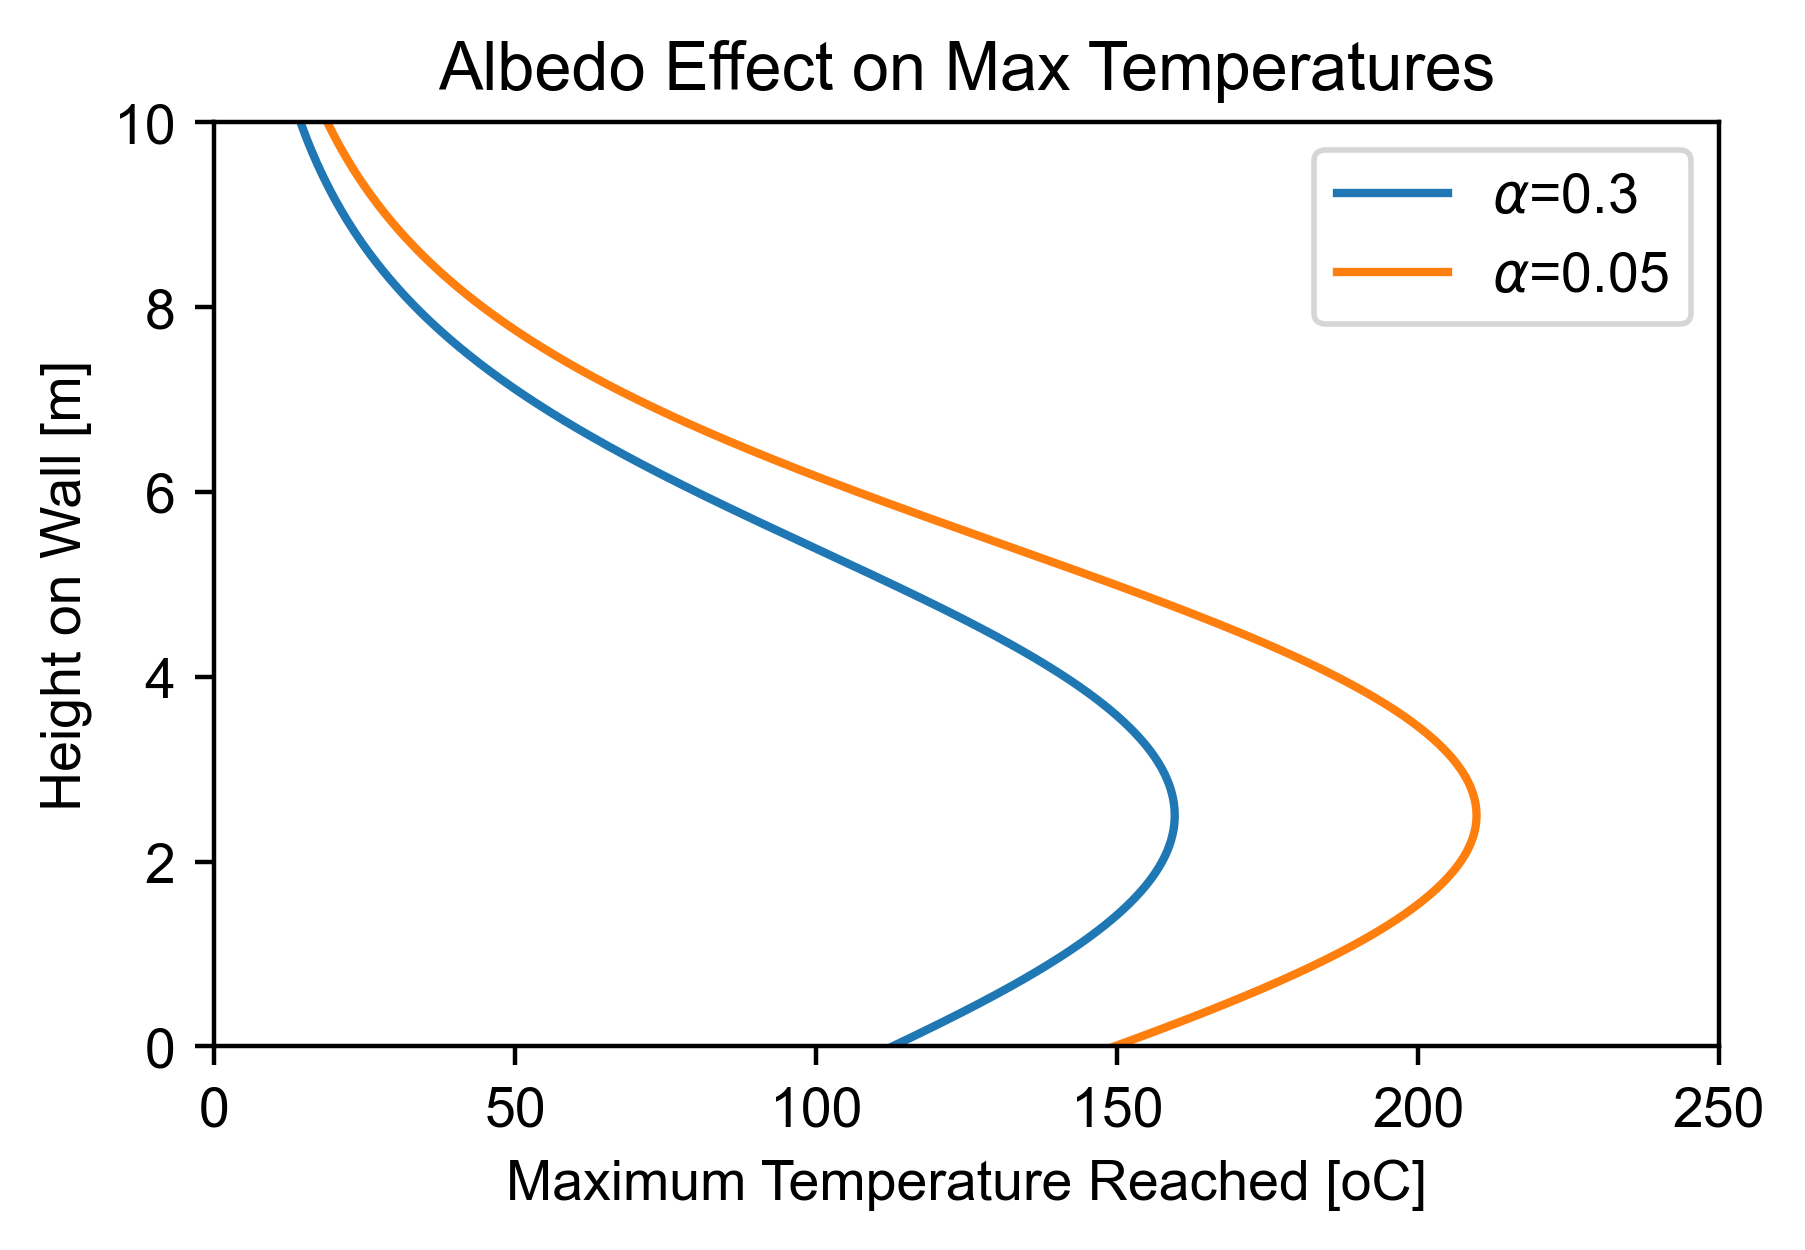

In [63]:
fig = plt.figure(figsize=(1.618*3,3))

max_depth = 10
length = len(xmid[:max_depth])

plt.plot([np.max(T[:,0,z])-273.15 for z in range(len(z_vals))], z_vals, label=r'$\alpha$=0.3')
plt.plot([np.max(T2[:,0,z])-273.15 for z in range(len(z_vals))], z_vals, label=r'$\alpha$=0.05')


plt.legend()
plt.xlim(0,250)
plt.ylim(0,10)
plt.xlabel('Maximum Temperature Reached [oC]')
plt.ylabel('Height on Wall [m]')
plt.title('Albedo Effect on Max Temperatures')

plt.savefig('media/figures/fig15.pdf')

In [203]:
range(len(z_vals))

range(0, 101)

In [220]:
print(np.max(T[:,0,:])-273.15,np.max(T2[:,0,:])-273.15)

159.57780928329356 209.71997781069


In [81]:
# fig, (ax1) = plt.subplots(1,1,figsize=(1.618*4,4))

# max_depth = 21
# length = len(xmid[:max_depth])

# for x in range(len(xmid[:max_depth])):
#     if x%2==0:
#         ax1.plot(t, T[:,x,125]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100), zorder=10)

# ax1.legend(fontsize=8, loc='upper right')
# ax1.set_xlim(0,7200)
# ax1.set_ylim(10,300)
# ax1.set_xlabel('Time [s]')
# ax1.set_ylabel('Temperature [oC]', color='red')
# ax1.set_title('Temperature/Time by Depth')
# ax1.tick_params(axis='y', labelcolor='red')

# ax2 = ax1.twinx()
# ax2.text(135,100,'Tree Temperature', fontsize=8, rotation=77)
# ax2.set_ylabel('Tree Temperature [oC]')
# ax2.plot(t,Tf-273.15, c='k', alpha=0.5, zorder=1)
# ax2.scatter([t[1250],t[2300],t[4000],t[6000]],[Tf[1250]-273.15,Tf[2300]-273.15,Tf[4000]-273.15,Tf[6000]-273.15],zorder=10,c='red',edgecolor='black')
# ax2.tick_params(axis='y', labelcolor='black')
# ax2.set_ylim(-10,1200)
# ax2.set_xlabel('Normalized Flux')

Text(0.5, 0, 'Time [s]')

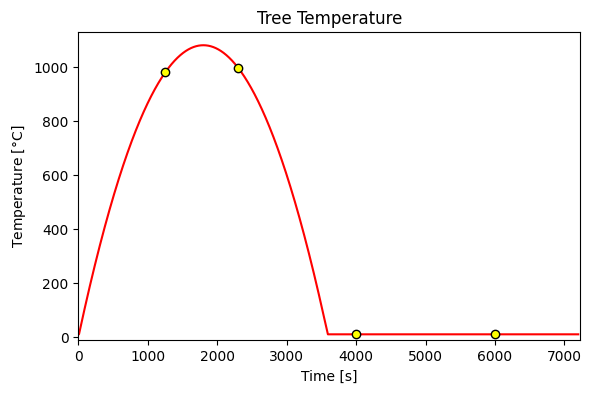

In [67]:
fig, (ax2) = plt.subplots(1,1,figsize=(1.618*4,4))

Tf = Temp(t)
ax2.plot(t,Tf, c='red')
ax2.scatter([t[1250],t[2300],t[4000],t[6000]],[Tf[1250],Tf[2300],Tf[4000],Tf[6000]],zorder=10,c='yellow',edgecolor='black')
ax2.set_xlim(0,tmax+25)
ax2.set_ylim(-10,max(Tf)+50)
ax2.set_title('Tree Temperature')
ax2.set_ylabel('Temperature [$\degree$C]')
ax2.set_xlabel('Time [s]')

Text(0.5, 1.0, 'Surface Temperatures')

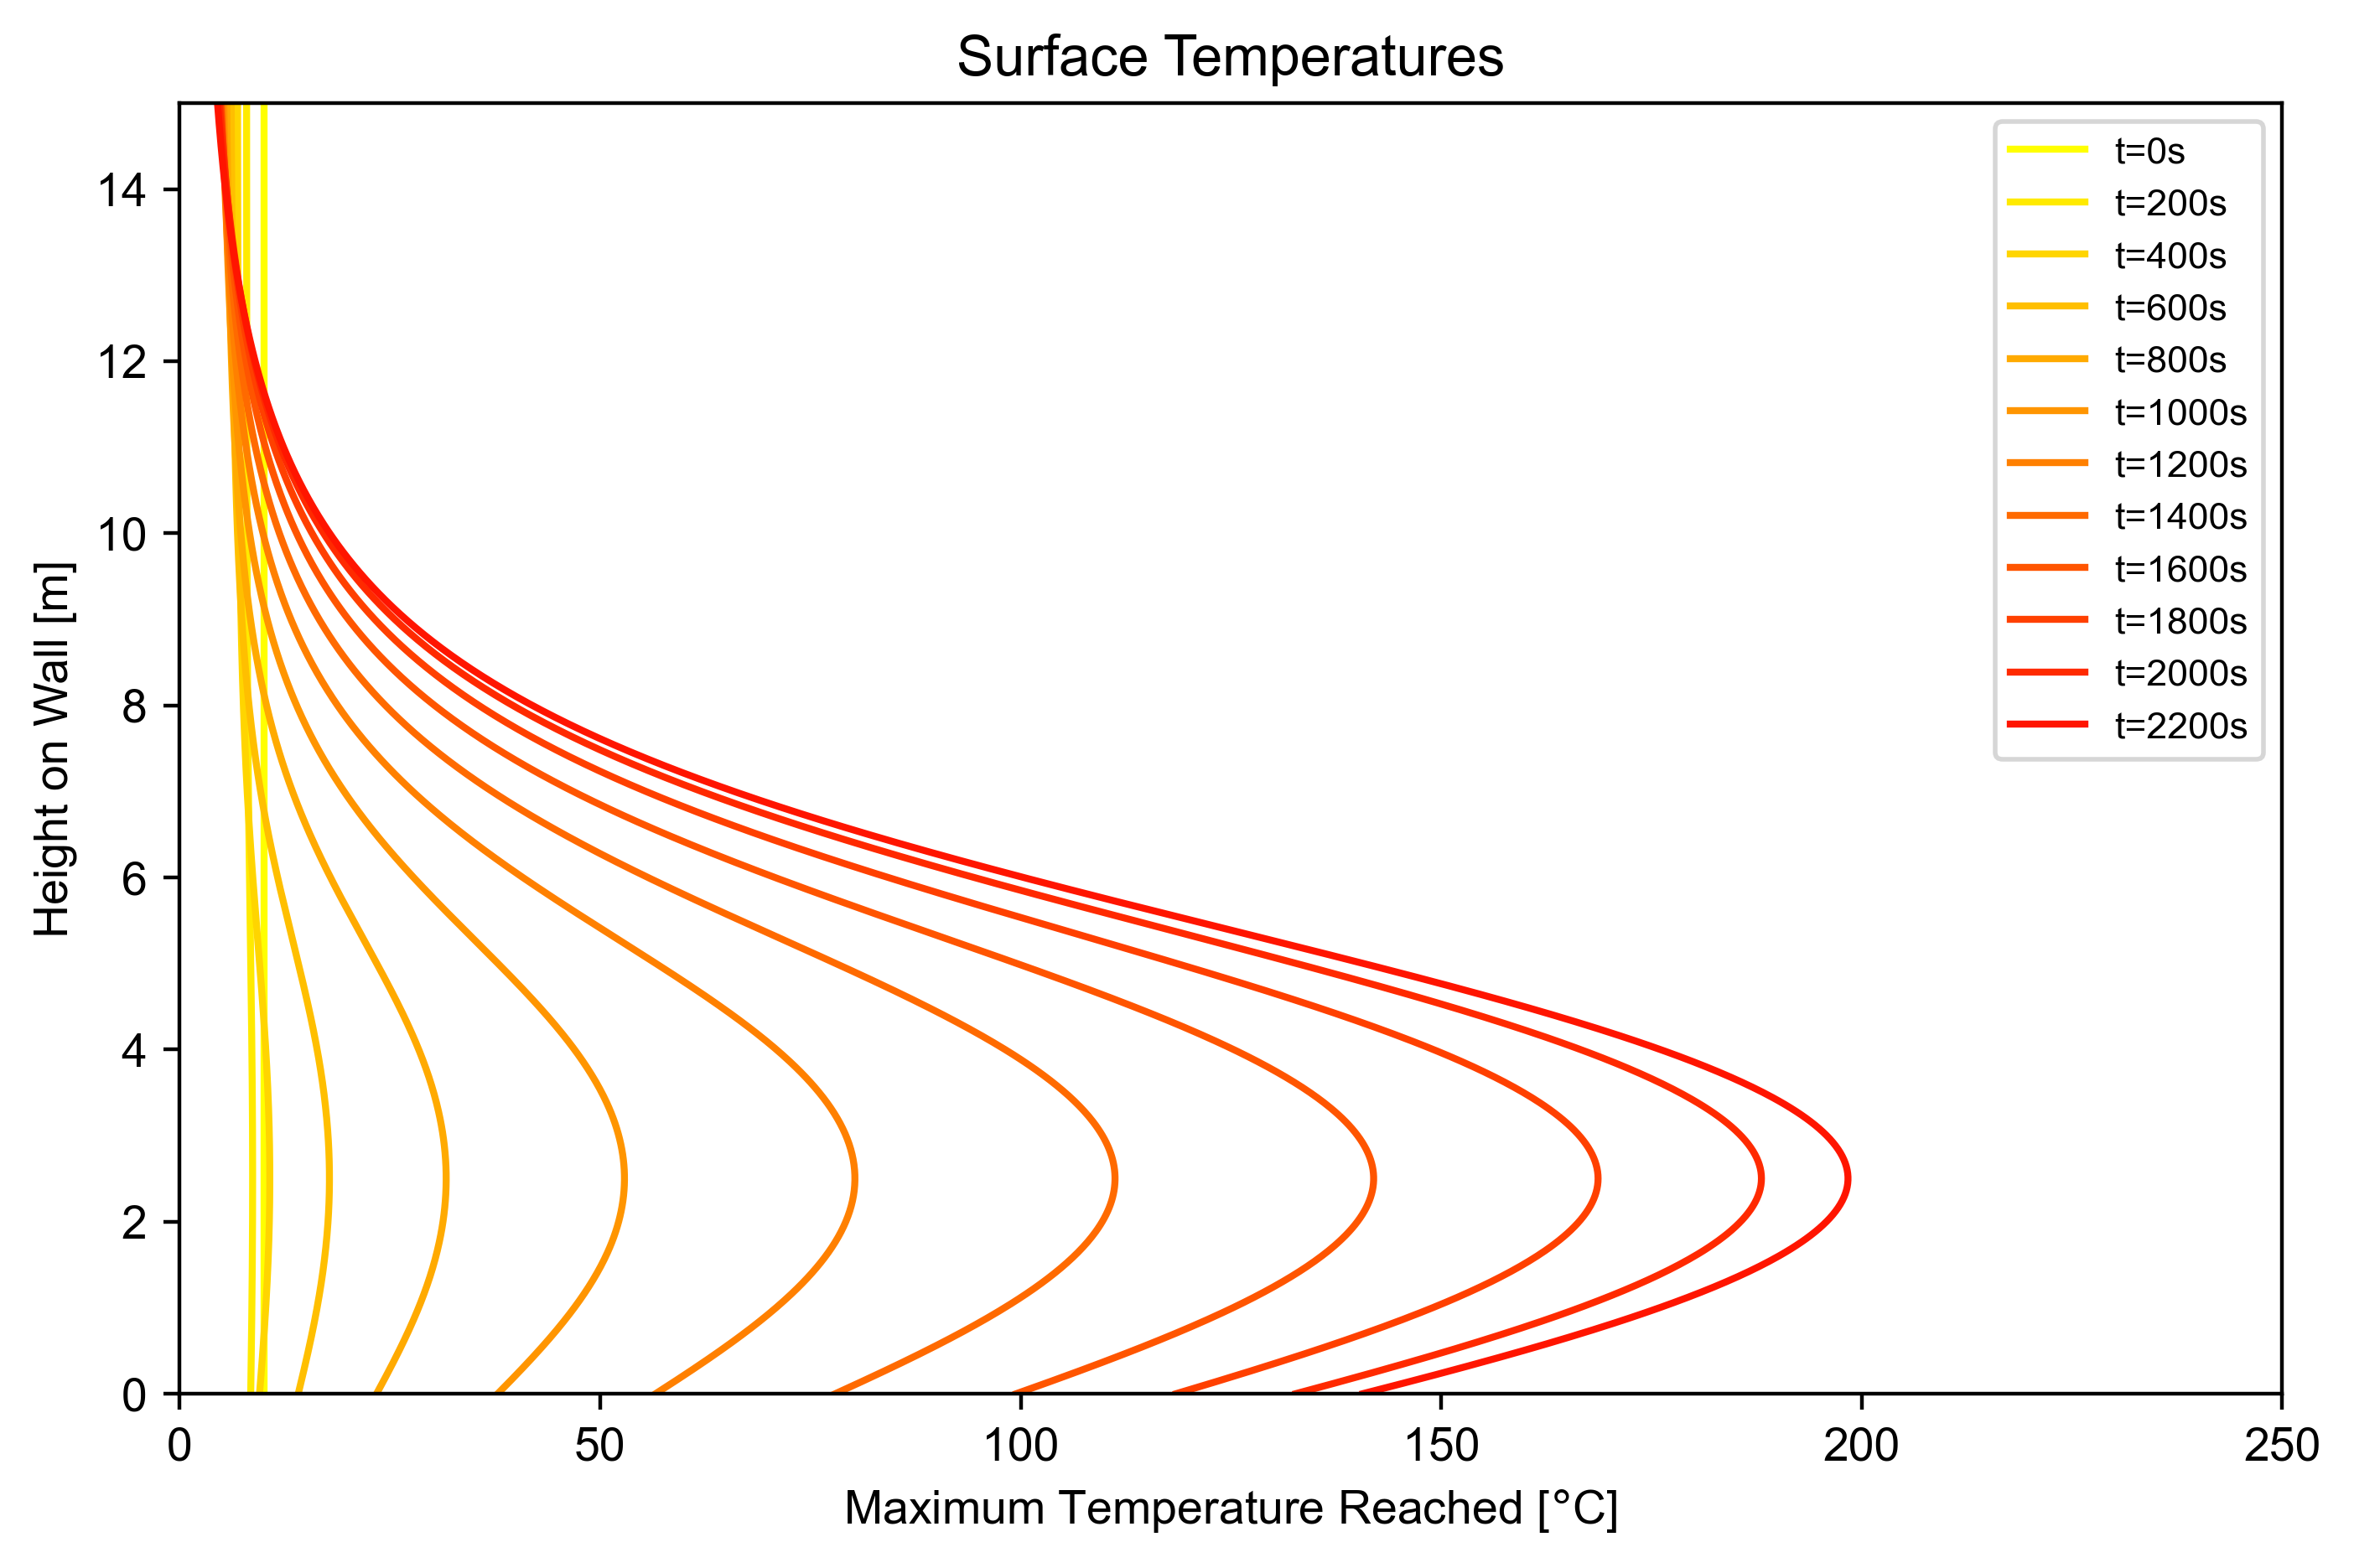

In [17]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])
index = 2400

for ti in range(len(t[:index])):
    if ti%200==0:
        plt.plot([np.max(T[ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,1-ti/len(t[:index]),0), label='t={}s'.format(t[ti]))

plt.legend(fontsize=8)
plt.xlim(0,250)
plt.ylim(0,15)
plt.xlabel('Maximum Temperature Reached [$\degree$C]')
plt.ylabel('Height on Wall [m]')
plt.title('Surface Temperatures')

Text(0.5, 1.0, 'Surface Temperatures')

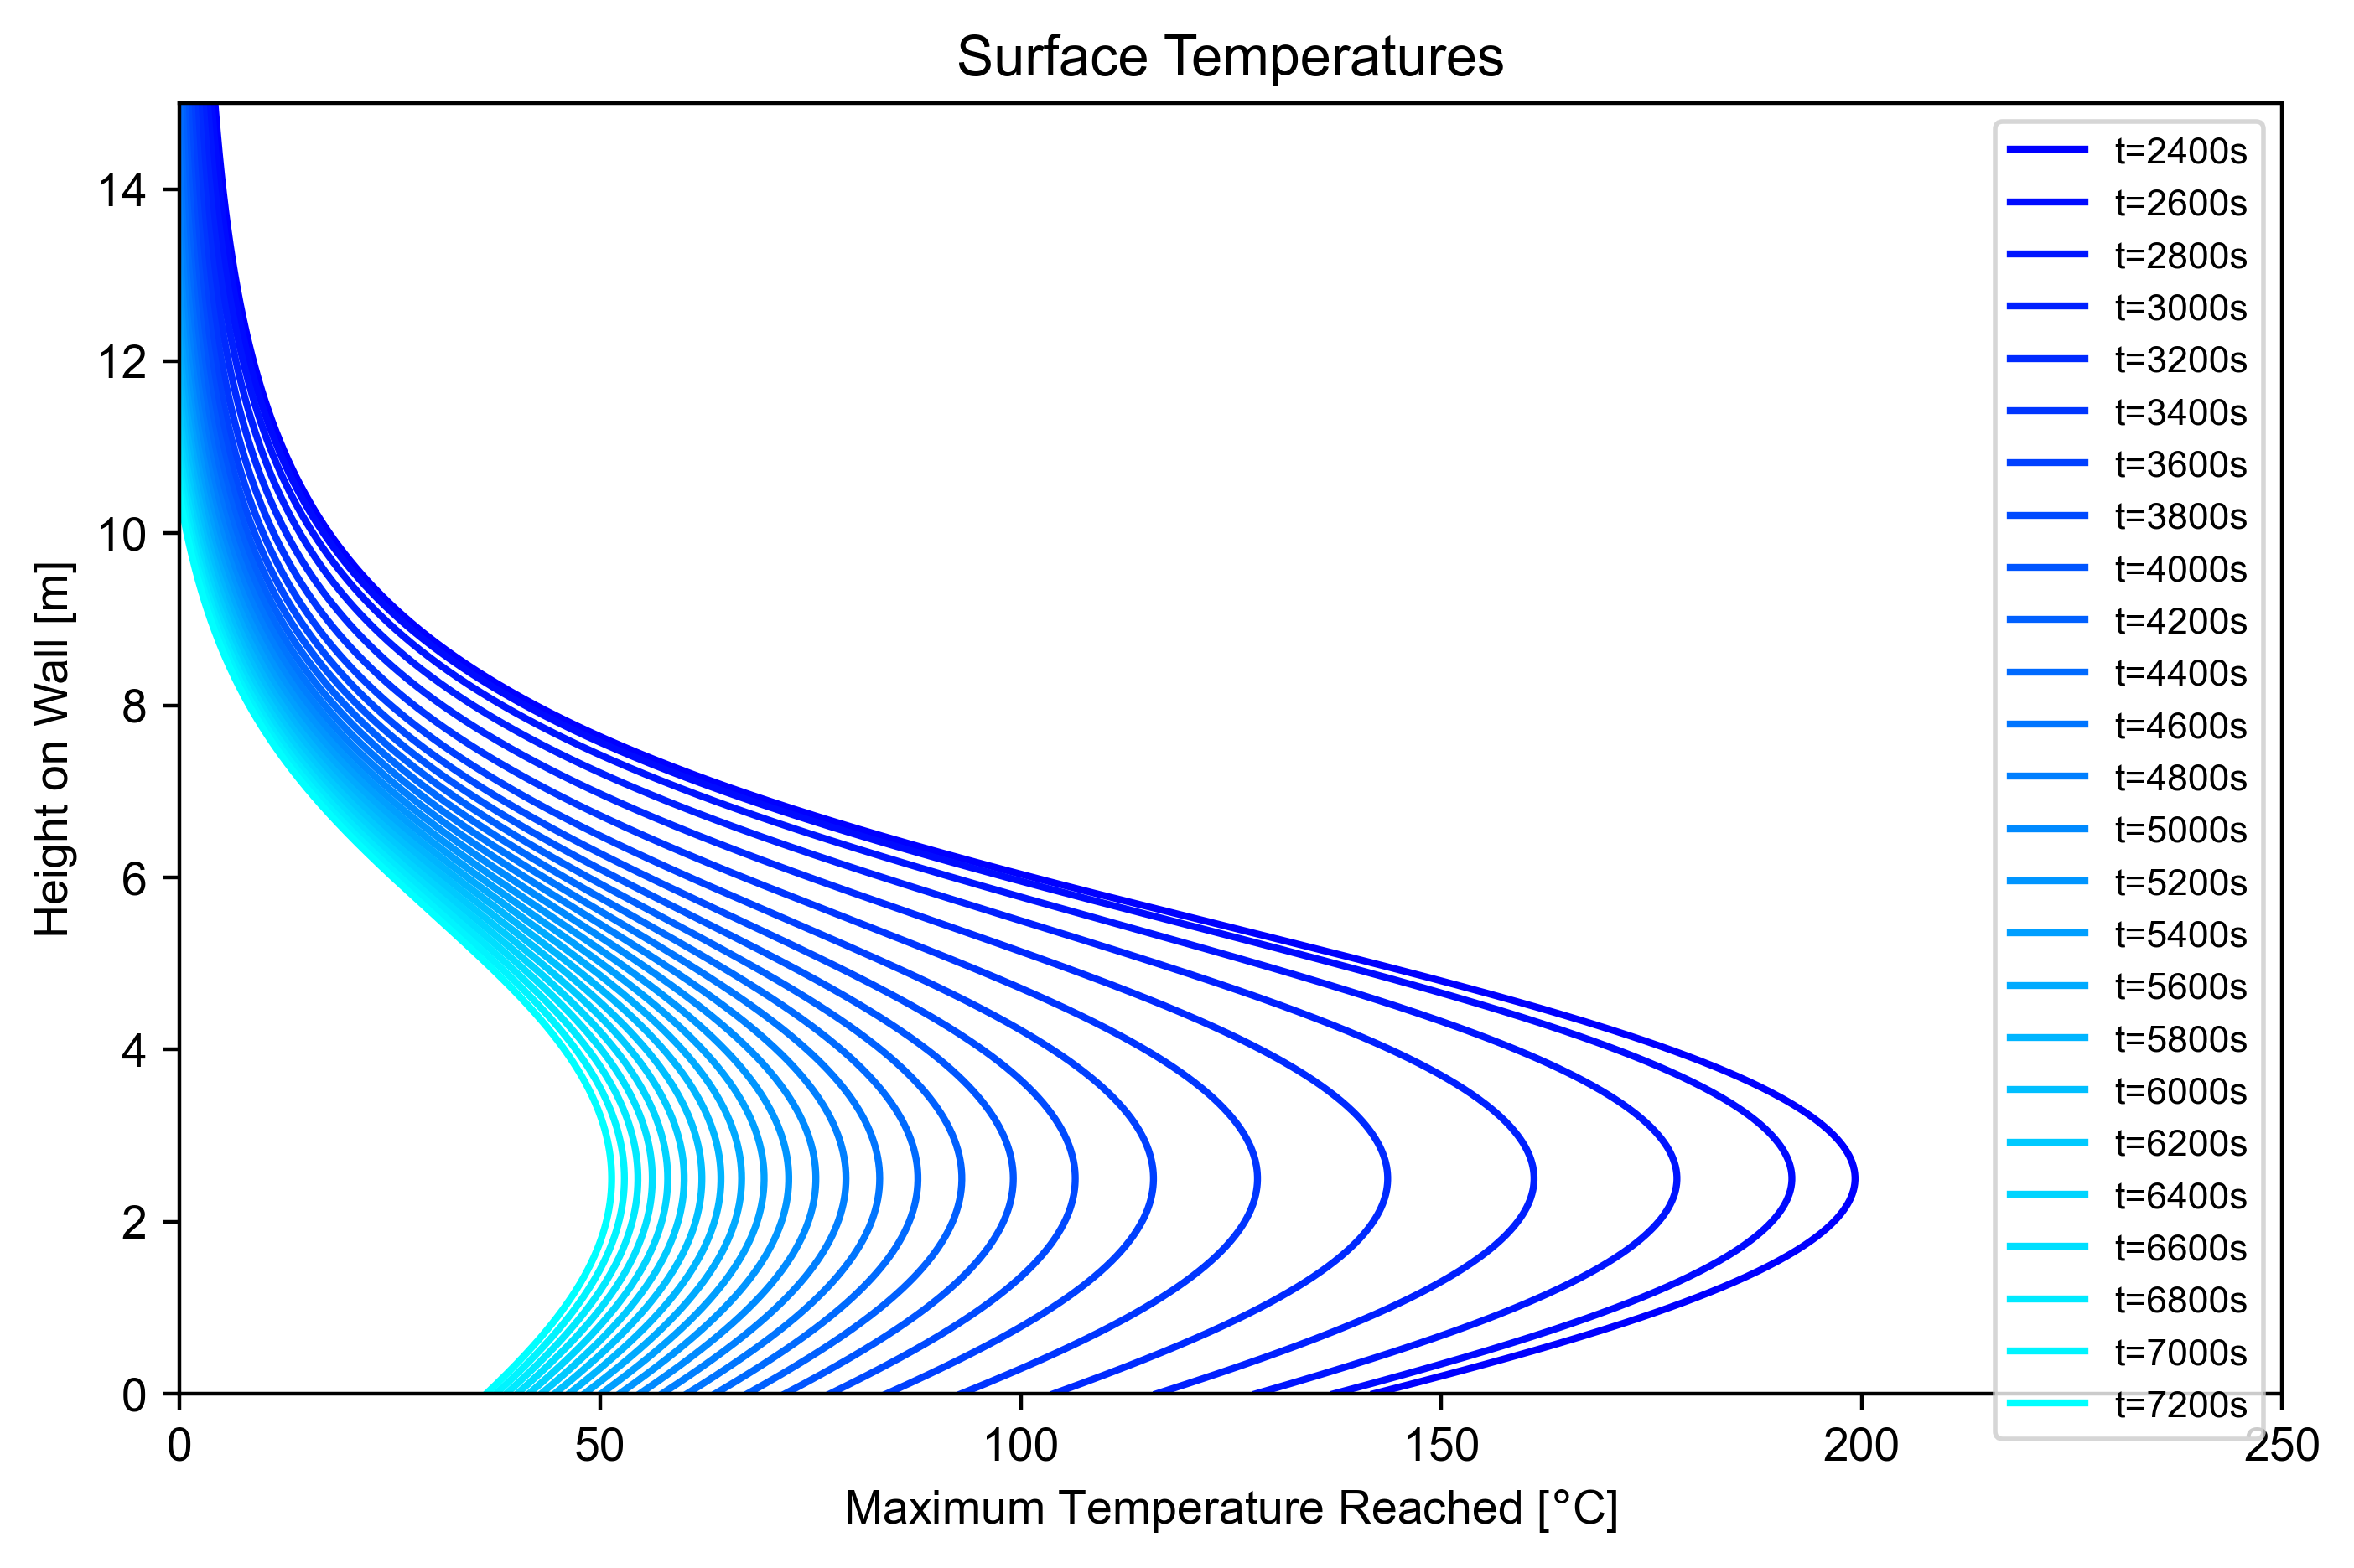

In [18]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])

index = 2400

for ti in range(len(t[index:])):
    if ti%200==0:
        plt.plot([np.max(T[index+ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(0,ti/len(t[index:]),1), label='t={}s'.format(t[index+ti]))

plt.legend(fontsize=8)
plt.xlim(0,250)
plt.ylim(0,15)
plt.xlabel('Maximum Temperature Reached [$\degree$C]')
plt.ylabel('Height on Wall [m]')
plt.title('Surface Temperatures')

Text(0.5, 1.0, 'Surface Temperatures')

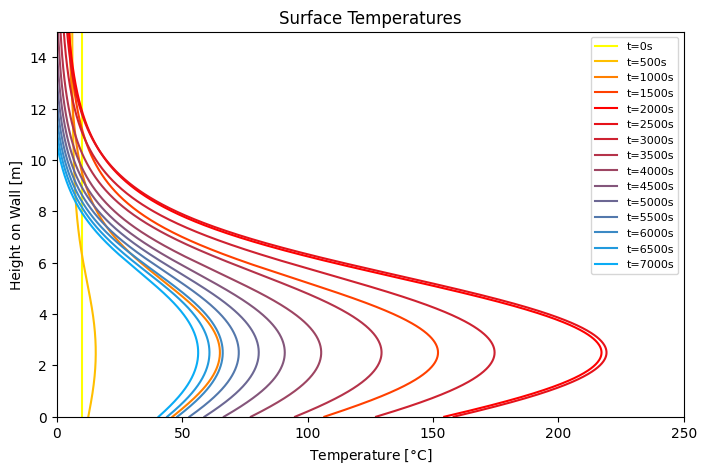

In [76]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])
index = 2000

for ti in range(len(t)):
    if ti%500==0:
        if t[ti]<=index:
            plt.plot([np.max(T[ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,1-ti/len(t[:index]),0), label='t={}s'.format(t[ti]))
        else:
            plt.plot([np.max(T[ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1-(ti-index)/len(t[index:]),0.7*(ti-index)/len(t[index:]),(ti-index)/len(t[index:])), label='t={}s'.format(t[ti]))
plt.legend(fontsize=8)
plt.xlim(0,250)
plt.ylim(0,15)
plt.xlabel('Temperature [$\degree$C]')
plt.ylabel('Height on Wall [m]')
plt.title('Surface Temperatures')

In [48]:
ti

7200

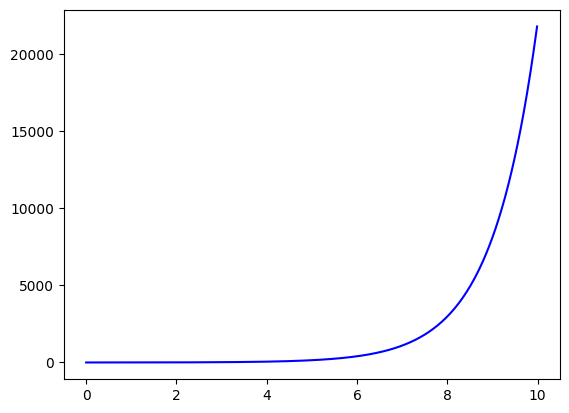

In [59]:
plt.plot(np.arange(0,10,0.01),[np.exp(x) for x in np.arange(0,10,0.01)], c=(0,0,1))

In [49]:
(ti-index)/len(t[index:])

0.9998000399920016

Text(0.5, 1.0, 'Temperature Map at t=1250s')

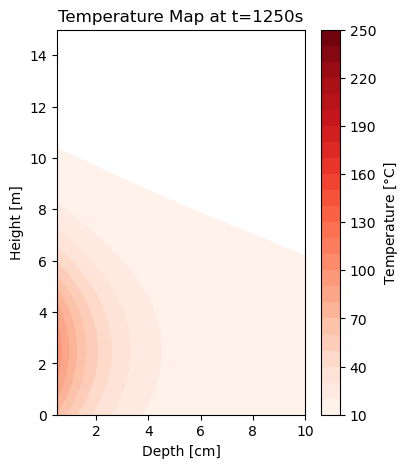

In [27]:
fig = plt.figure(figsize=(4,5))


X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,250+10,10)

tindex = 1250

plt.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
plt.colorbar(label=r'Temperature [$\degree$C]')
plt.xlim(0.5,10)
plt.xlabel('Depth [cm]')
plt.ylabel('Height [m]')
plt.title('Temperature Map at t={}s'.format(t[tindex]))

Text(0.5, 1.0, 'Temperature Map at t=2300s')

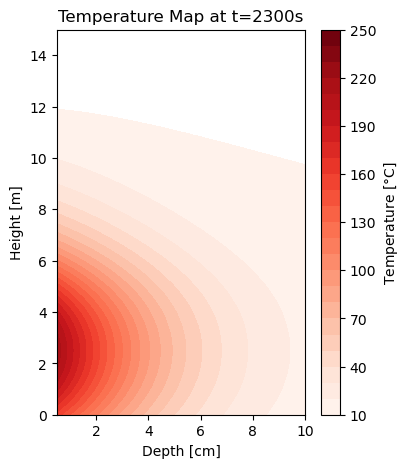

In [29]:
fig = plt.figure(figsize=(4,5))


X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,250+10,10)

tindex = 2300

plt.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
plt.colorbar(label=r'Temperature [$\degree$C]')
plt.xlim(0.5,10)
plt.xlabel('Depth [cm]')
plt.ylabel('Height [m]')
plt.title('Temperature Map at t={}s'.format(t[tindex]))

Text(0.5, 1.0, 'Temperature Map at t=4000s')

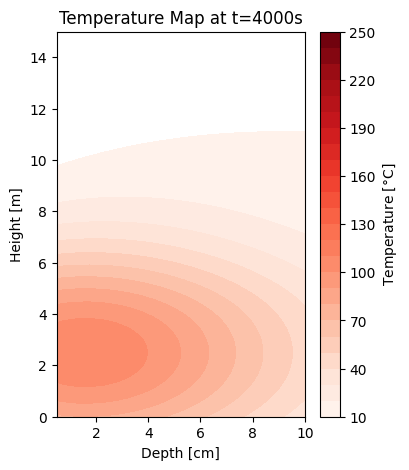

In [20]:
fig = plt.figure(figsize=(4,5))


X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,250+10,10)
levels2 = np.arange(150,160,10)

tindex = 4000

plt.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
#plt.contour(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels, zorder=10)

plt.colorbar(label=r'Temperature [$\degree$C]')
plt.xlim(0.5,10)
plt.xlabel('Depth [cm]')
plt.ylabel('Height [m]')
plt.title('Temperature Map at t={}s'.format(t[tindex]))

Text(0.5, 1.0, 'Temperature Map at t=6000s')

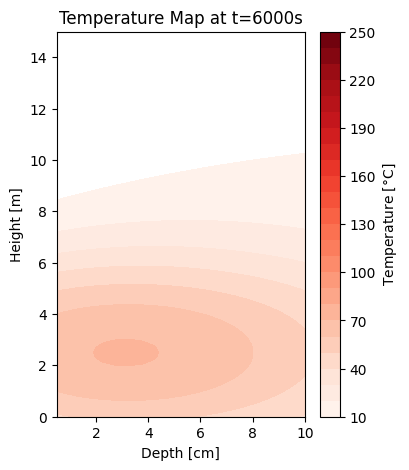

In [66]:
fig = plt.figure(figsize=(4,5))


X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,250+10,10)
levels2 = np.arange(150,160,10)

tindex = 6000

plt.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
#plt.contour(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels, zorder=10)

plt.colorbar(label=r'Temperature [$\degree$C]')
plt.xlim(0.5,10)
plt.xlabel('Depth [cm]')
plt.ylabel('Height [m]')
plt.title('Temperature Map at t={}s'.format(t[tindex]))

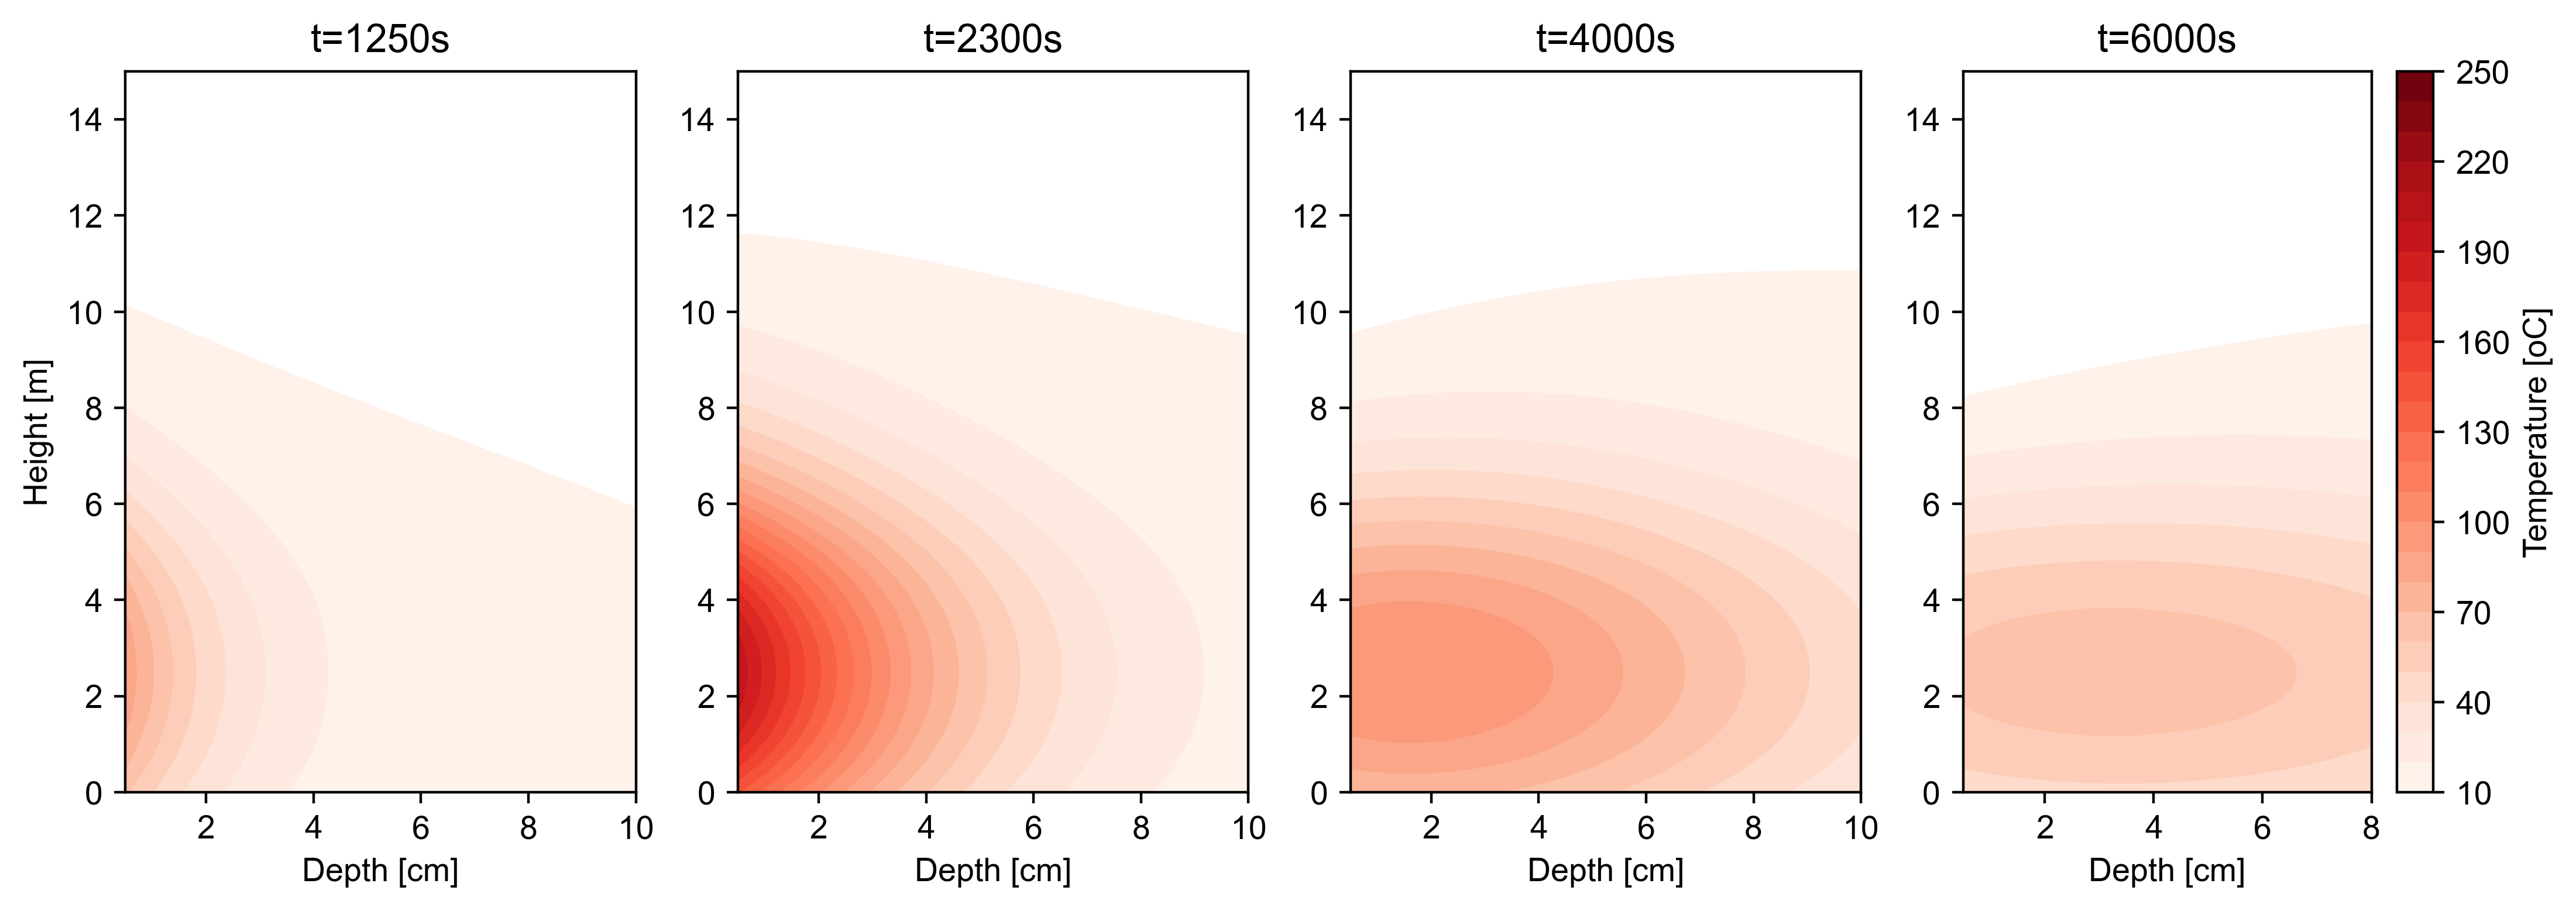

In [12]:
fig, axs = plt.subplots(1,4,figsize=(1.618*8,4))
ax1=axs[0]
ax2=axs[1]
ax3=axs[2]
ax4=axs[3]

X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,250+10,10)

tindex = 1250
tindex2 = 2300
tindex3 = 4000
tindex4 = 6000

cm = ax1.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
ax2.contourf(X,Y,T[tindex2,:,:]-273.15,cmap='Reds', levels=levels)
ax3.contourf(X,Y,T[tindex3,:,:]-273.15,cmap='Reds', levels=levels)
ax4.contourf(X,Y,T[tindex4,:,:]-273.15,cmap='Reds', levels=levels)


fig.colorbar(cm, label='Temperature [oC]', ax=ax4)
#fig.colorbar(cm, ax=axs[:], location='bottom')

ax1.set_xlim(0.5,10)
ax2.set_xlim(0.5,10)
ax3.set_xlim(0.5,10)
ax4.set_xlim(0.5,8)

ax1.set_xlabel('Depth [cm]')
ax2.set_xlabel('Depth [cm]')
ax3.set_xlabel('Depth [cm]')
ax4.set_xlabel('Depth [cm]')

ax1.set_ylabel('Height [m]')
ax1.set_title('t={}s'.format(t[tindex]))
ax2.set_title('t={}s'.format(t[tindex2]))
ax3.set_title('t={}s'.format(t[tindex3]))
ax4.set_title('t={}s'.format(t[tindex4]))

plt.savefig('media/figures/fig10.pdf')

Text(0.5, 1.0, 'Temperatures by Depth')

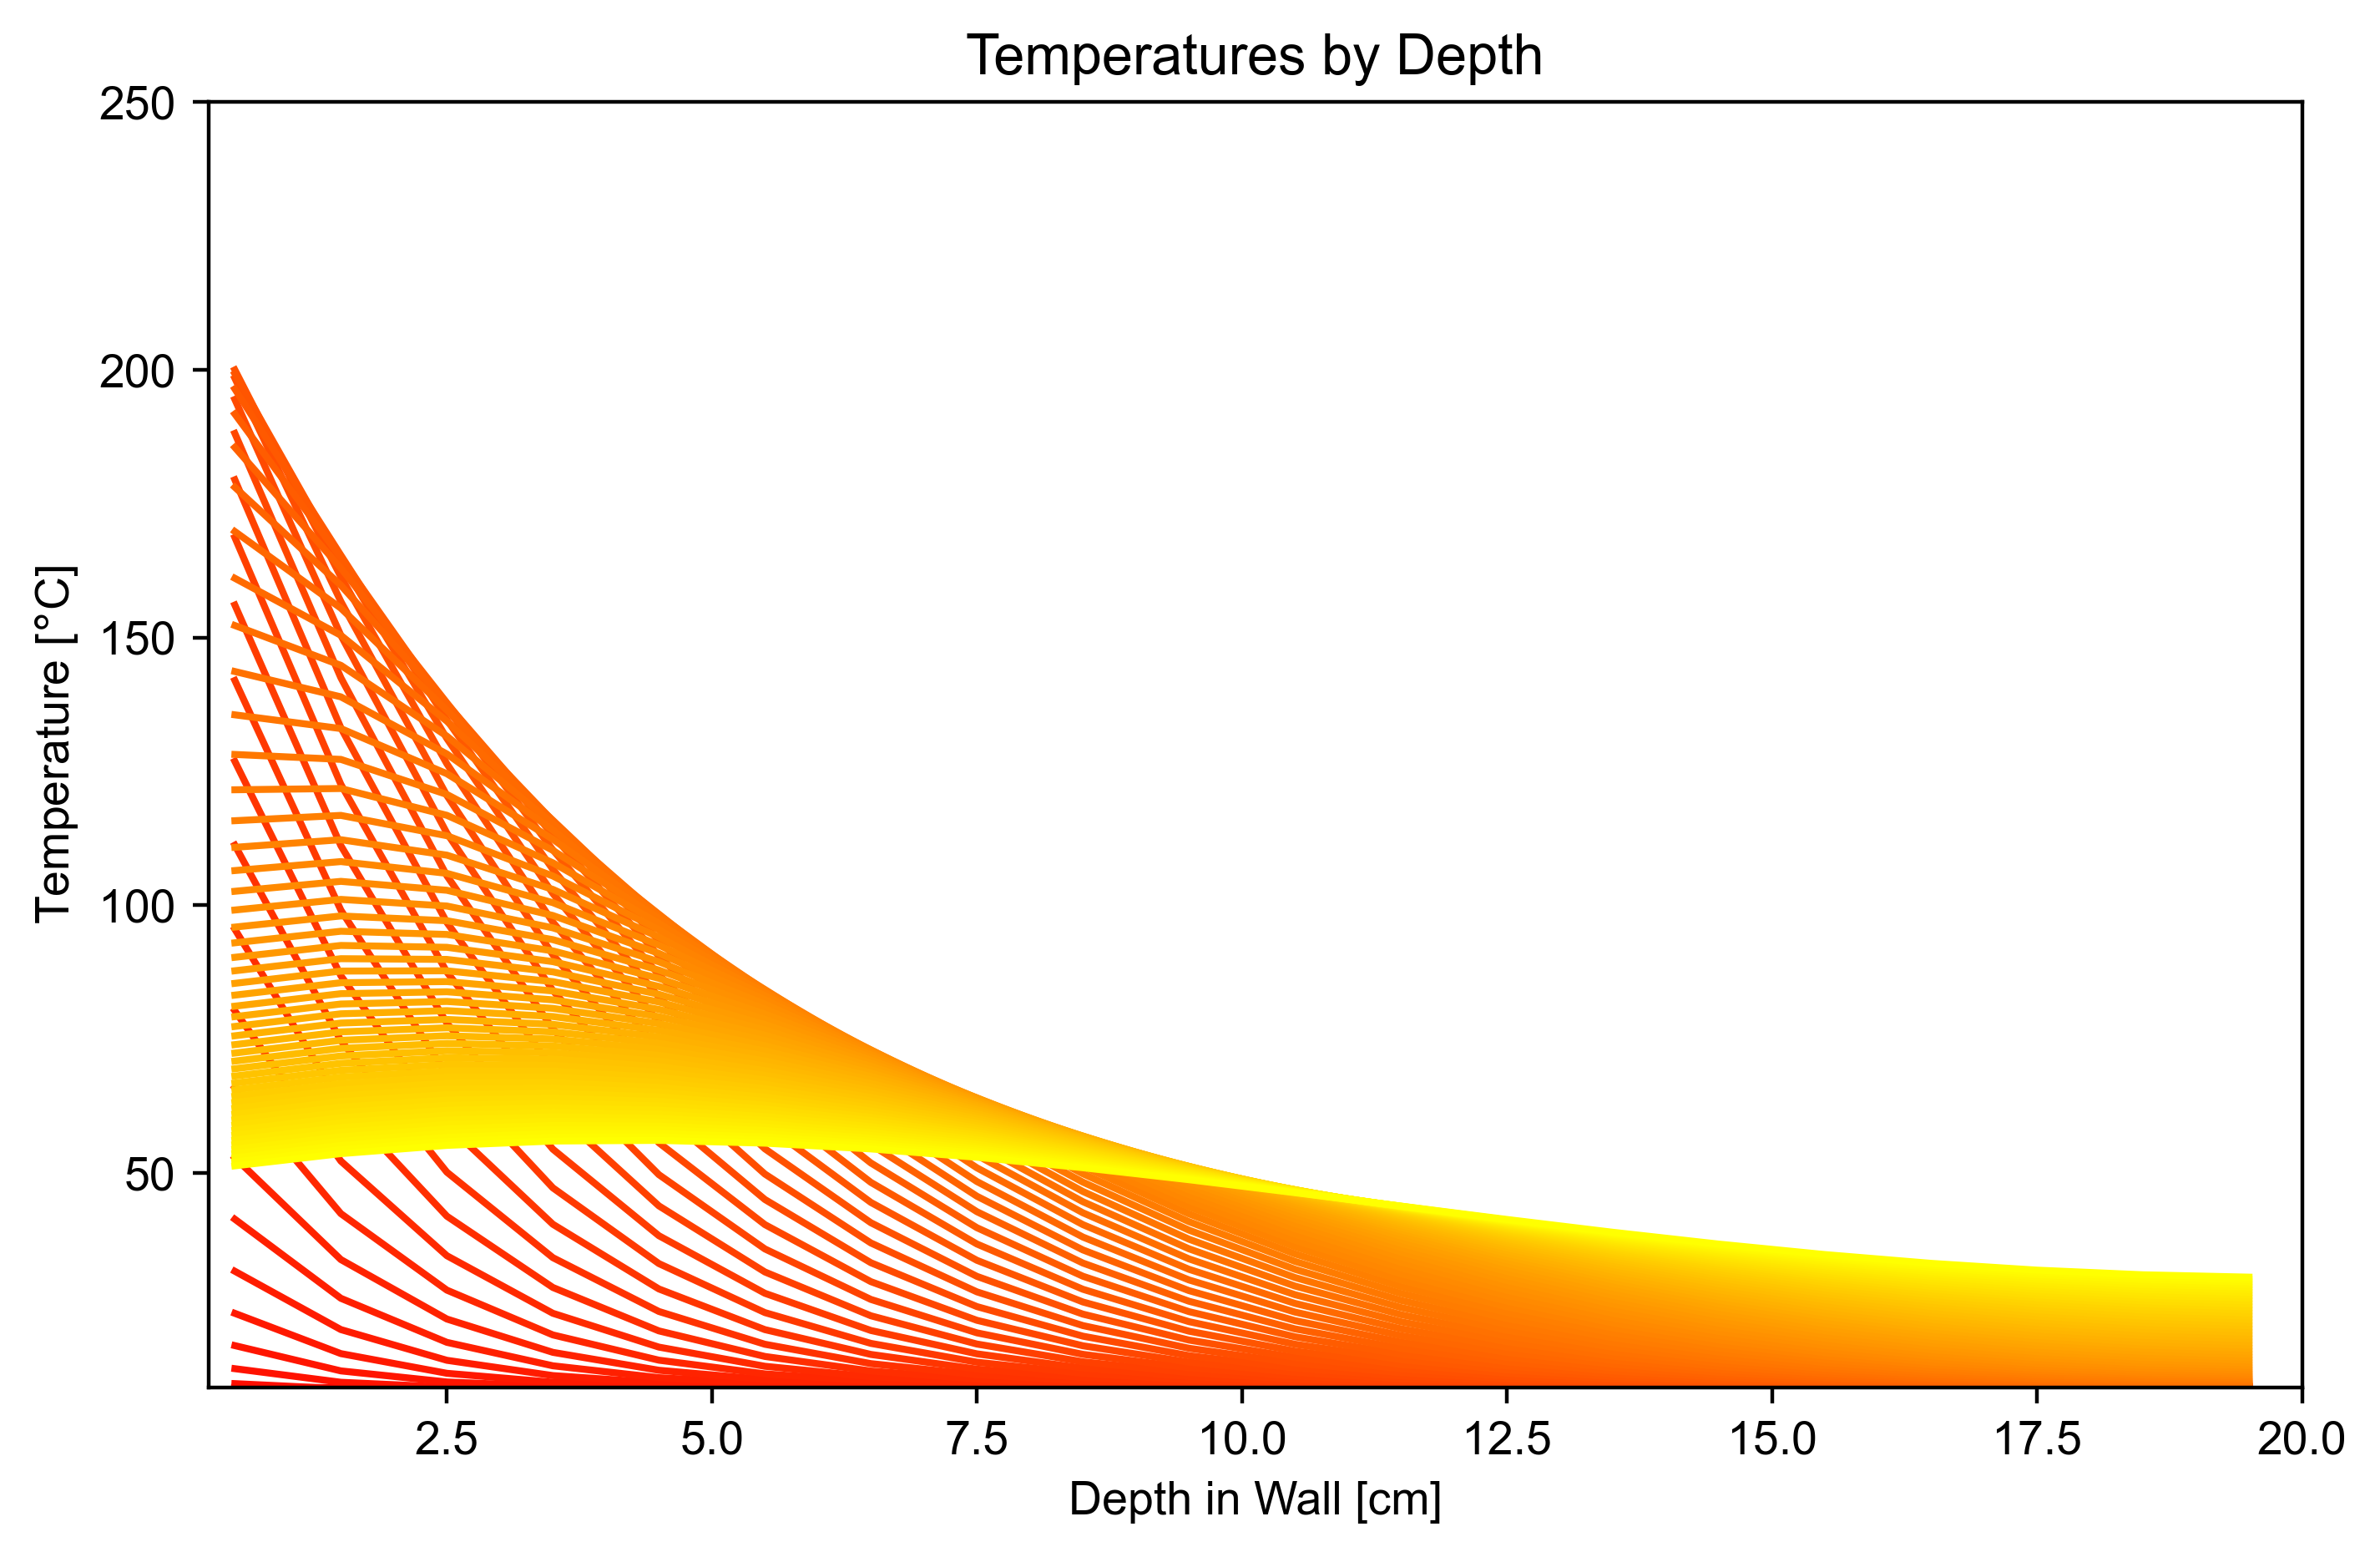

In [20]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])
index = 0

for ti in range(len(t[index:])):
    if ti%100==0:
        plt.plot(xmid*100, [np.max(T[ti+index,x,125])-273.15 for x in range(len(xmid))], c=(1,ti/len(t[index:]),0))

#plt.legend(fontsize=8)
plt.xlim(0.25,20)
plt.ylim(10,250)
plt.xlabel(r'Depth in Wall [cm]')
plt.ylabel(r'Temperature [$\degree$C]')
plt.title('Temperatures by Depth')

In [ ]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    plt.plot([np.max(T[:,x,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,x/length,0), label='depth={:.2f}cm'.format(xmid[x]*100))

plt.legend()
plt.xlim(0,250)
plt.ylim(0,15)
plt.xlabel(r'Maximum Temperature Reached [$\degree$C]')
plt.ylabel('Height on Wall [m]')
plt.title('Height/Max Temp Profiles by Depth')

In [ ]:
fig, (ax1) = plt.subplots(1,1,figsize=(1.618*4,4))

max_depth = 21
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    if x%2==0:
        ax1.plot(t, T[:,x,125]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100), zorder=10)

ax1.legend(fontsize=8, loc='upper right')
ax1.set_xlim(0,7200)
ax1.set_ylim(10,300)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel(r'Temperature [$\degree$C]', color='red')
ax1.set_title('Temperature/Time by Depth')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.text(135,100,'Tree Temperature', fontsize=8, rotation=77)
ax2.set_ylabel(r'Tree Temperature [$\degree$C]')
ax2.plot(t,Tf, c='k', alpha=0.5, zorder=1)
ax2.scatter([t[1250],t[2300],t[4000],t[6000]],[Tf[1250],Tf[2300],Tf[4000],Tf[6000]],zorder=10,c='red',edgecolor='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(-10,1200)
ax2.set_xlabel('Normalized Flux')

In [ ]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])
index = 2000

for ti in range(len(t)):
    if ti%500==0:
        if t[ti]<=index:
            plt.plot([np.max(T[ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,1-ti/len(t[:index]),0), label='t={}s'.format(t[ti]))
        else:
            plt.plot([np.max(T[ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1-(ti-index)/len(t[index:]),0.7*(ti-index)/len(t[index:]),(ti-index)/len(t[index:])), label='t={}s'.format(t[ti]))
plt.legend(fontsize=8)
plt.xlim(0,250)
plt.ylim(0,15)
plt.xlabel('Temperature [$\degree$C]')
plt.ylabel('Height on Wall [m]')
plt.title('Surface Temperatures')

In [ ]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])
index = 0

for ti in range(len(t[index:])):
    if ti%100==0:
        plt.plot(xmid*100, [np.max(T[ti+index,x,125])-273.15 for x in range(len(xmid))], c=(1,ti/len(t[index:]),0))

#plt.legend(fontsize=8)
plt.xlim(0.25,20)
plt.ylim(10,250)
plt.xlabel(r'Depth in Wall [cm]')
plt.ylabel(r'Temperature [$\degree$C]')
plt.title('Temperatures by Depth')

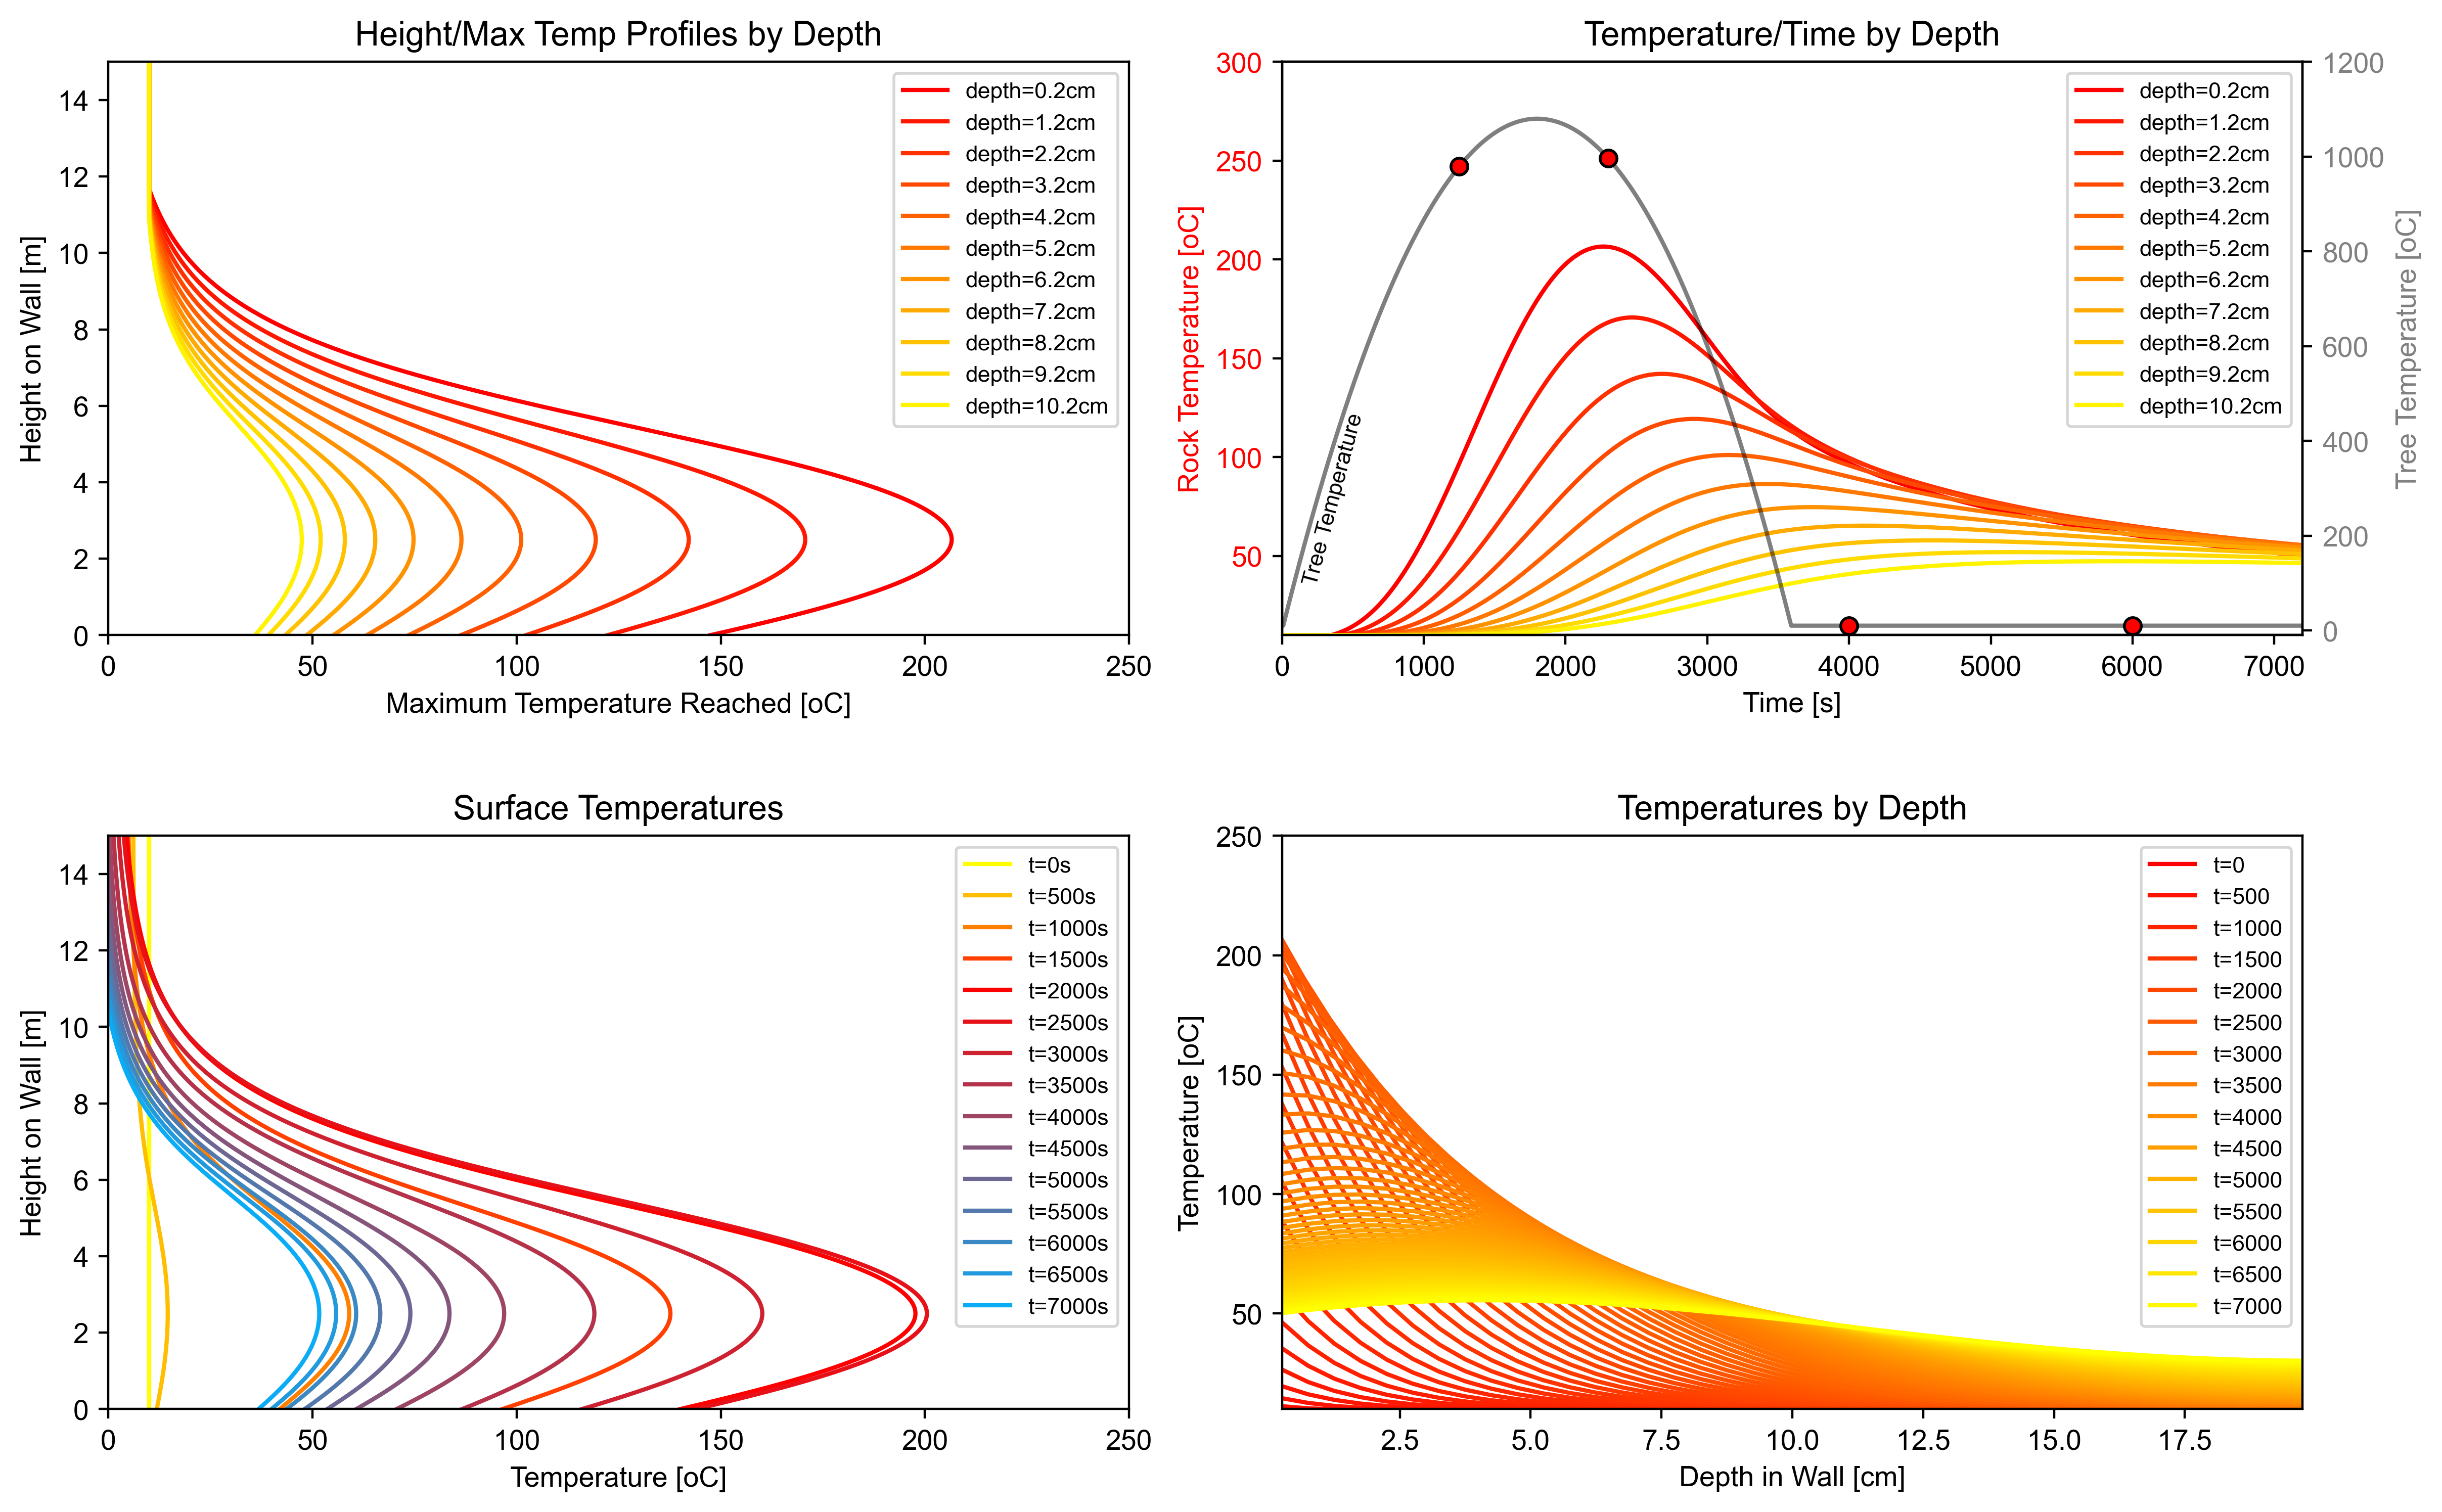

In [37]:
fig, axs = plt.subplots(2,2,figsize=(14,14/1.618))
ax1=axs[0,0]
ax2=axs[0,1]
ax3=axs[1,0]
ax4=axs[1,1]
plt.subplots_adjust(wspace=0.15,hspace=0.35)

########## top left ##################

max_depth = 21
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    if x%2==0:
        ax1.plot([np.max(T[:,x,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

ax1.legend(fontsize=8)
ax1.set_xlim(0,250)
ax1.set_ylim(0,15)
ax1.set_xlabel('Maximum Temperature Reached [oC]')
ax1.set_ylabel('Height on Wall [m]')
ax1.set_title('Height/Max Temp Profiles by Depth')

########## top right #################

max_depth = 21
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    if x%2==0:
        ax2.plot(t, T[:,x,125]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100), zorder=10)

ax2.legend(fontsize=8, loc='upper right')
ax2.set_xlim(0,7200)
ax2.set_ylim(10,300)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Rock Temperature [oC]', color='red')
ax2.set_title('Temperature/Time by Depth')
ax2.tick_params(axis='y', labelcolor='red')

ax5 = ax2.twinx()
ax5.text(135,100,'Tree Temperature', fontsize=8, rotation=75)
ax5.set_ylabel('Tree Temperature [oC]', color='grey')
ax5.plot(t,Tf-273.15, c='k', alpha=0.5, zorder=1)
ax5.scatter([t[1250],t[2300],t[4000],t[6000]],np.array([Tf[1250],Tf[2300],Tf[4000],Tf[6000]])-273.15,zorder=10,c='red',edgecolor='black')
ax5.tick_params(axis='y', labelcolor='grey')
ax5.set_ylim(-10,1200)
ax5.set_xlabel('Normalized Flux')

########## lower left ################

max_depth = 10
length = len(xmid[:max_depth])
index = 2000

for ti in range(len(t)):
    if ti%500==0:
        if t[ti]<=index:
            ax3.plot([np.max(T[ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,1-ti/len(t[:index]),0), label='t={}s'.format(t[ti]))
        else:
            ax3.plot([np.max(T[ti,0,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1-(ti-index)/len(t[index:]),0.7*(ti-index)/len(t[index:]),(ti-index)/len(t[index:])), label='t={}s'.format(t[ti]))
ax3.legend(fontsize=8)
ax3.set_xlim(0,250)
ax3.set_ylim(0,15)
ax3.set_xlabel('Temperature [oC]')
ax3.set_ylabel('Height on Wall [m]')
ax3.set_title('Surface Temperatures')

########## lower right ###############

max_depth = 10
length = len(xmid[:max_depth])
index = 0

for ti in range(len(t[index:])):
    if ti%100==0:
        if ti%500==0:
            ax4.plot(xmid*100, [np.max(T[ti+index,x,125])-273.15 for x in range(len(xmid))], c=(1,ti/len(t[index:]),0), label='t={:.0f}'.format(ti+index))
        else:
            ax4.plot(xmid*100, [np.max(T[ti+index,x,125])-273.15 for x in range(len(xmid))], c=(1,ti/len(t[index:]),0))

ax4.legend(fontsize=8)
ax4.set_xlim(0.25,19.75)
ax4.set_ylim(10,250)
ax4.set_xlabel('Depth in Wall [cm]')
ax4.set_ylabel('Temperature [oC]')
ax4.set_title('Temperatures by Depth')

plt.savefig('media/figures/fig9.pdf')